In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
file_path = 'C:/Users/sw/Downloads/OrderDetails.csv'
df = pd.read_csv(file_path)

In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [39]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Order ID        3
User ID         3
Order Date      3
Meal Type       3
Dish Name       3
Order Status    3
Amount (USD)    3
Time of Day     3
Rating          5
Session ID      3
dtype: int64


In [42]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.dropna(subset=['Order ID'], inplace=True)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


C:\Users\sw\AppData\Local\Temp\ipykernel_13064\1577828895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [43]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
           Order ID User ID           Order Date Meal Type  Dish Name  \
count     16.000000      16                   16        16         16   
unique          NaN       8                  NaN         3          6   
top             NaN    U001                  NaN    Dinner  Spaghetti   
freq            NaN       3                  NaN         8          4   
mean    1008.500000     NaN  2024-12-04 12:00:00       NaN        NaN   
min     1001.000000     NaN  2024-12-01 00:00:00       NaN        NaN   
25%     1004.750000     NaN  2024-12-02 18:00:00       NaN        NaN   
50%     1008.500000     NaN  2024-12-04 12:00:00       NaN        NaN   
75%     1012.250000     NaN  2024-12-06 06:00:00       NaN        NaN   
max     1016.000000     NaN  2024-12-08 00:00:00       NaN        NaN   
std        4.760952     NaN                  NaN       NaN        NaN   

       Order Status  Amount (USD) Time of Day     Rating Session ID  
count            16     16.00000

In [44]:
sns.set_style("whitegrid")

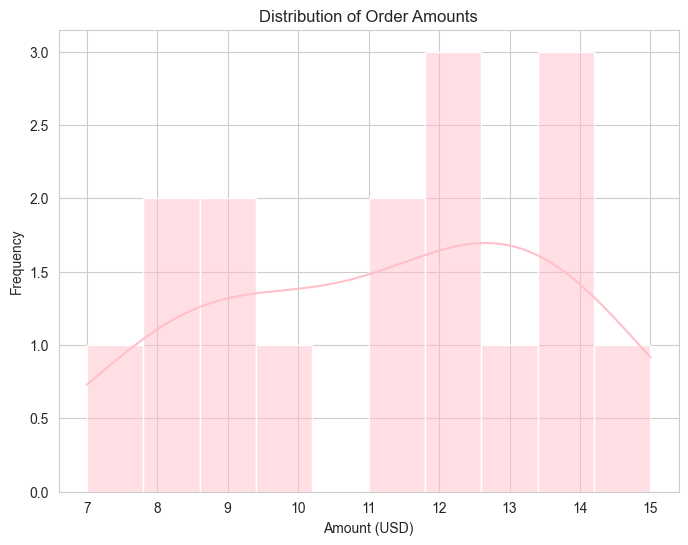

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount (USD)'], bins=10, kde=True, color='pink')
plt.title('Distribution of Order Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

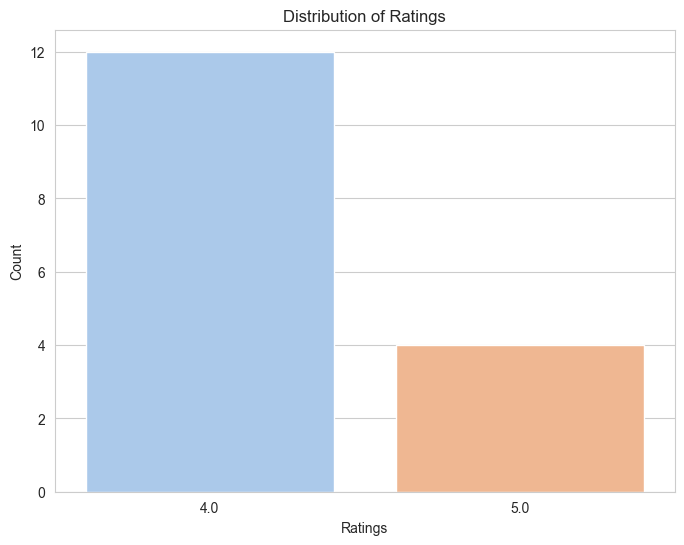

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette='pastel', hue='Rating', dodge=False, legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

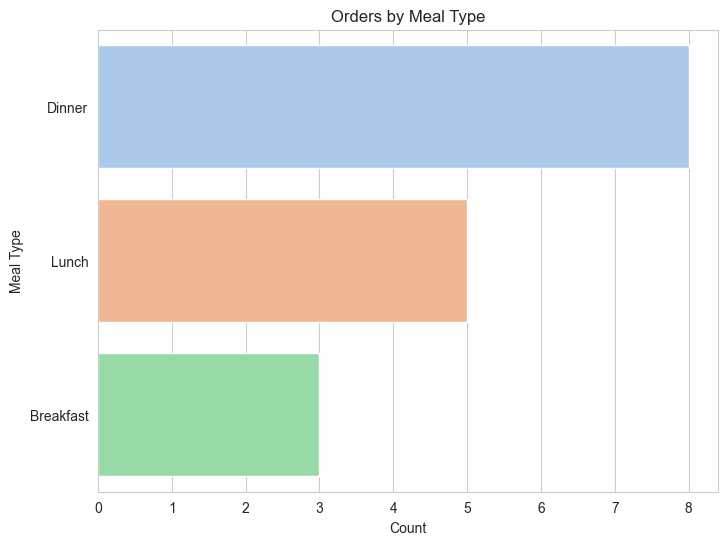

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Meal Type', data=df, palette='pastel', hue='Meal Type', dodge=False, order=df['Meal Type'].value_counts().index)
plt.title('Orders by Meal Type')
plt.xlabel('Count')
plt.ylabel('Meal Type')
plt.show()

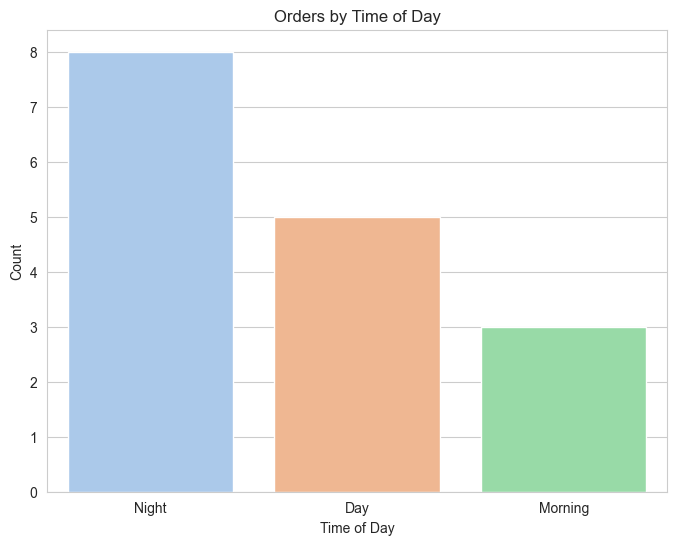

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Time of Day', data=df, palette='pastel', hue='Time of Day', dodge=False, order=df['Time of Day'].value_counts().index)
plt.title('Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

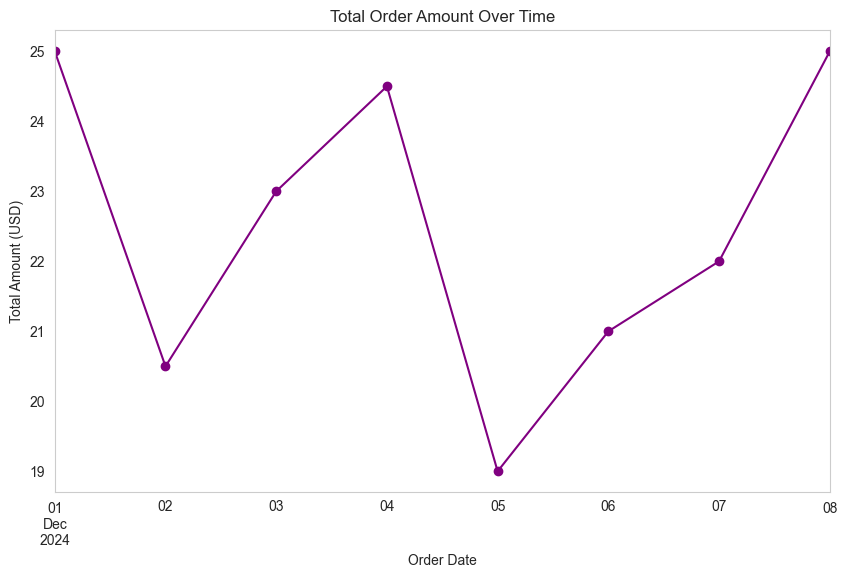

In [55]:
plt.figure(figsize=(10, 6))
df.groupby('Order Date')['Amount (USD)'].sum().plot(marker='o', color='purple')
plt.title('Total Order Amount Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Amount (USD)')
plt.grid()
plt.show()

In [57]:
file_path = 'C:/Users/sw/Downloads/CookingSessions.csv'
df = pd.read_csv(file_path)

In [59]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Session ID       16 non-null     object 
 1   User ID          16 non-null     object 
 2   Dish Name        16 non-null     object 
 3   Meal Type        16 non-null     object 
 4   Session Start    16 non-null     object 
 5   Session End      16 non-null     object 
 6   Duration (mins)  16 non-null     int64  
 7   Session Rating   16 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


(  Session ID User ID        Dish Name  Meal Type     Session Start  \
 0       S001    U001        Spaghetti     Dinner  2024-12-01 19:00   
 1       S002    U002     Caesar Salad      Lunch  2024-12-01 12:00   
 2       S003    U003  Grilled Chicken     Dinner  2024-12-02 19:30   
 3       S004    U001         Pancakes  Breakfast  2024-12-02 07:30   
 4       S005    U004     Caesar Salad      Lunch  2024-12-03 13:00   
 
         Session End  Duration (mins)  Session Rating  
 0  2024-12-01 19:30               30             4.5  
 1  2024-12-01 12:20               20             4.0  
 2  2024-12-02 20:10               40             4.8  
 3  2024-12-02 08:00               30             4.2  
 4  2024-12-03 13:15               15             4.7  ,
 None)

In [61]:
sns.set(style="whitegrid")

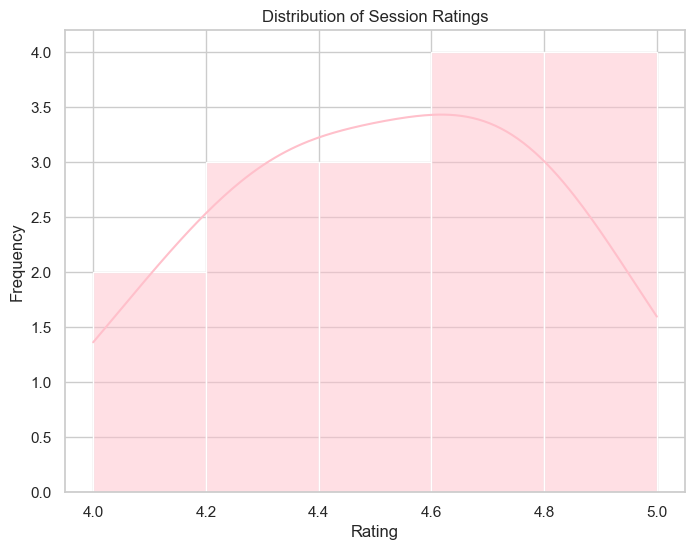

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Session Rating'], kde=True, color='pink', bins=5)
plt.title('Distribution of Session Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

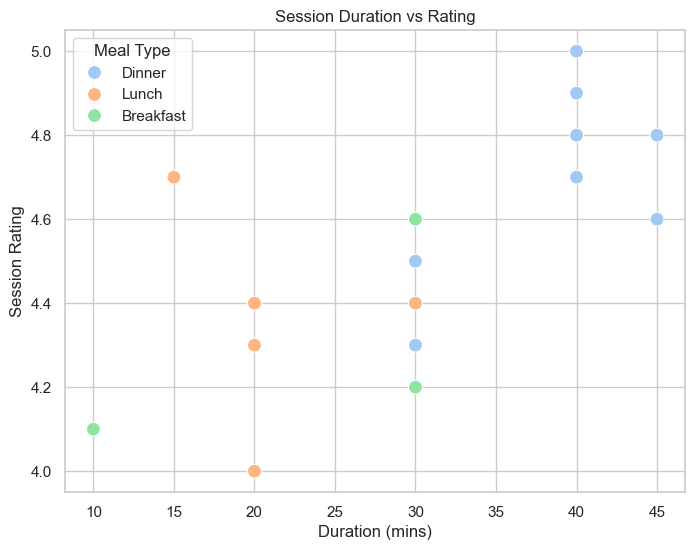

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Duration (mins)', y='Session Rating', hue='Meal Type', palette='pastel', s=100)
plt.title('Session Duration vs Rating')
plt.xlabel('Duration (mins)')
plt.ylabel('Session Rating')
plt.legend(title='Meal Type')
plt.show()

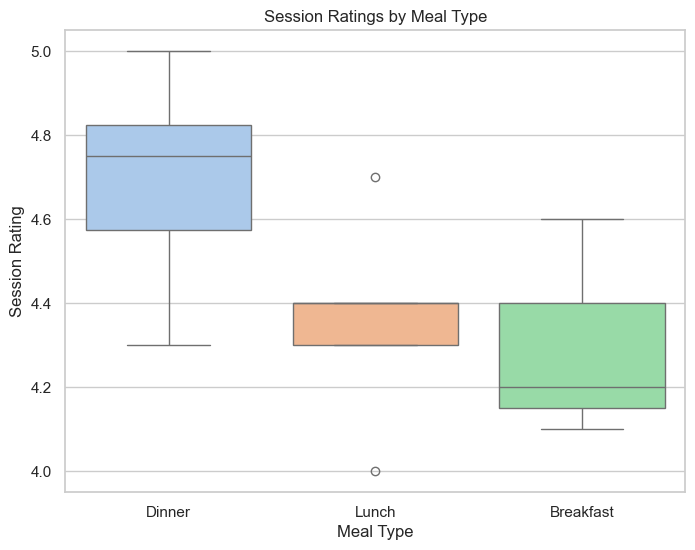

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Meal Type', y='Session Rating', hue='Meal Type', palette='pastel')
plt.title('Session Ratings by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Session Rating')
plt.show()

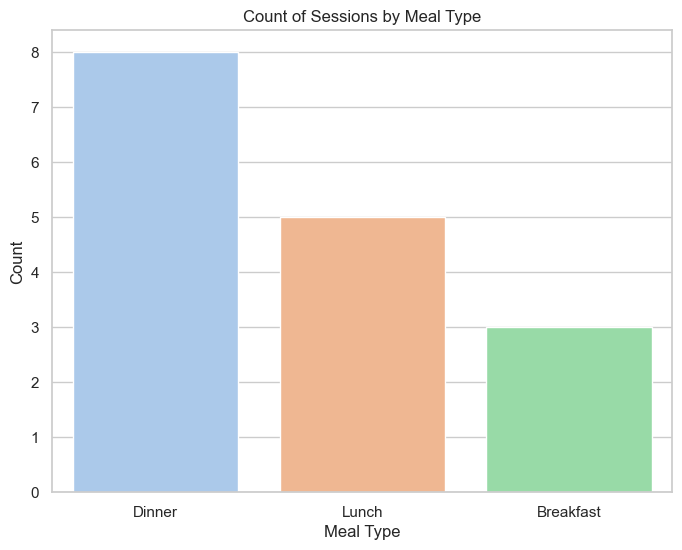

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Meal Type', hue='Meal Type', palette='pastel')
plt.title('Count of Sessions by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()

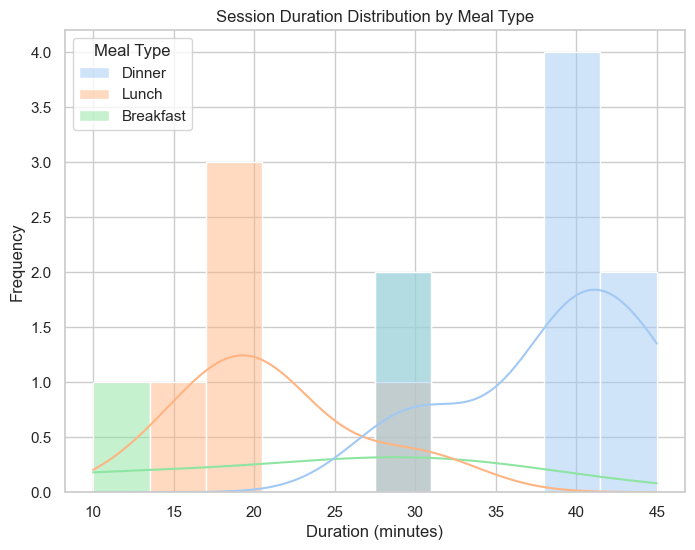

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Duration (mins)', hue='Meal Type', kde=True, bins=10, palette='pastel')
plt.title('Session Duration Distribution by Meal Type')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

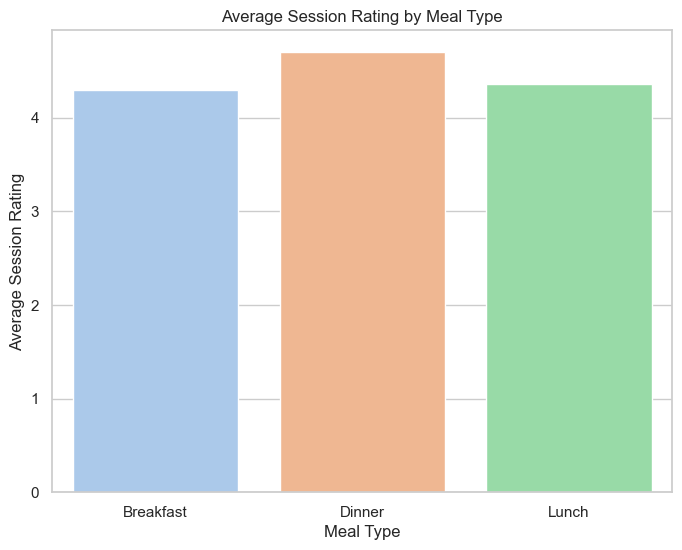

In [71]:
plt.figure(figsize=(8, 6))
avg_rating = df.groupby('Meal Type')['Session Rating'].mean().reset_index()
sns.barplot(data=avg_rating, x='Meal Type', y='Session Rating', hue='Meal Type', palette='pastel')
plt.title('Average Session Rating by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Session Rating')
plt.show()

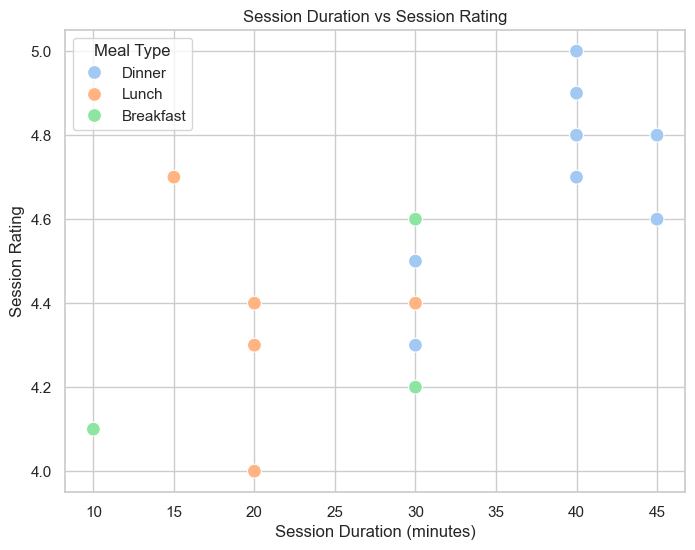

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Duration (mins)', y='Session Rating', hue='Meal Type', palette='pastel', s=100)
plt.title('Session Duration vs Session Rating')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Session Rating')
plt.legend(title='Meal Type')
plt.show()

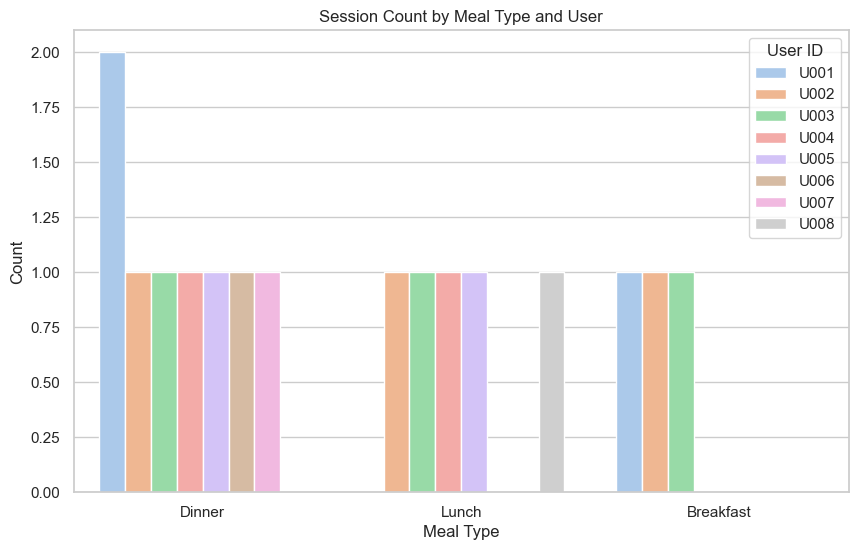

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Meal Type', hue='User ID', palette='pastel')
plt.title('Session Count by Meal Type and User')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()

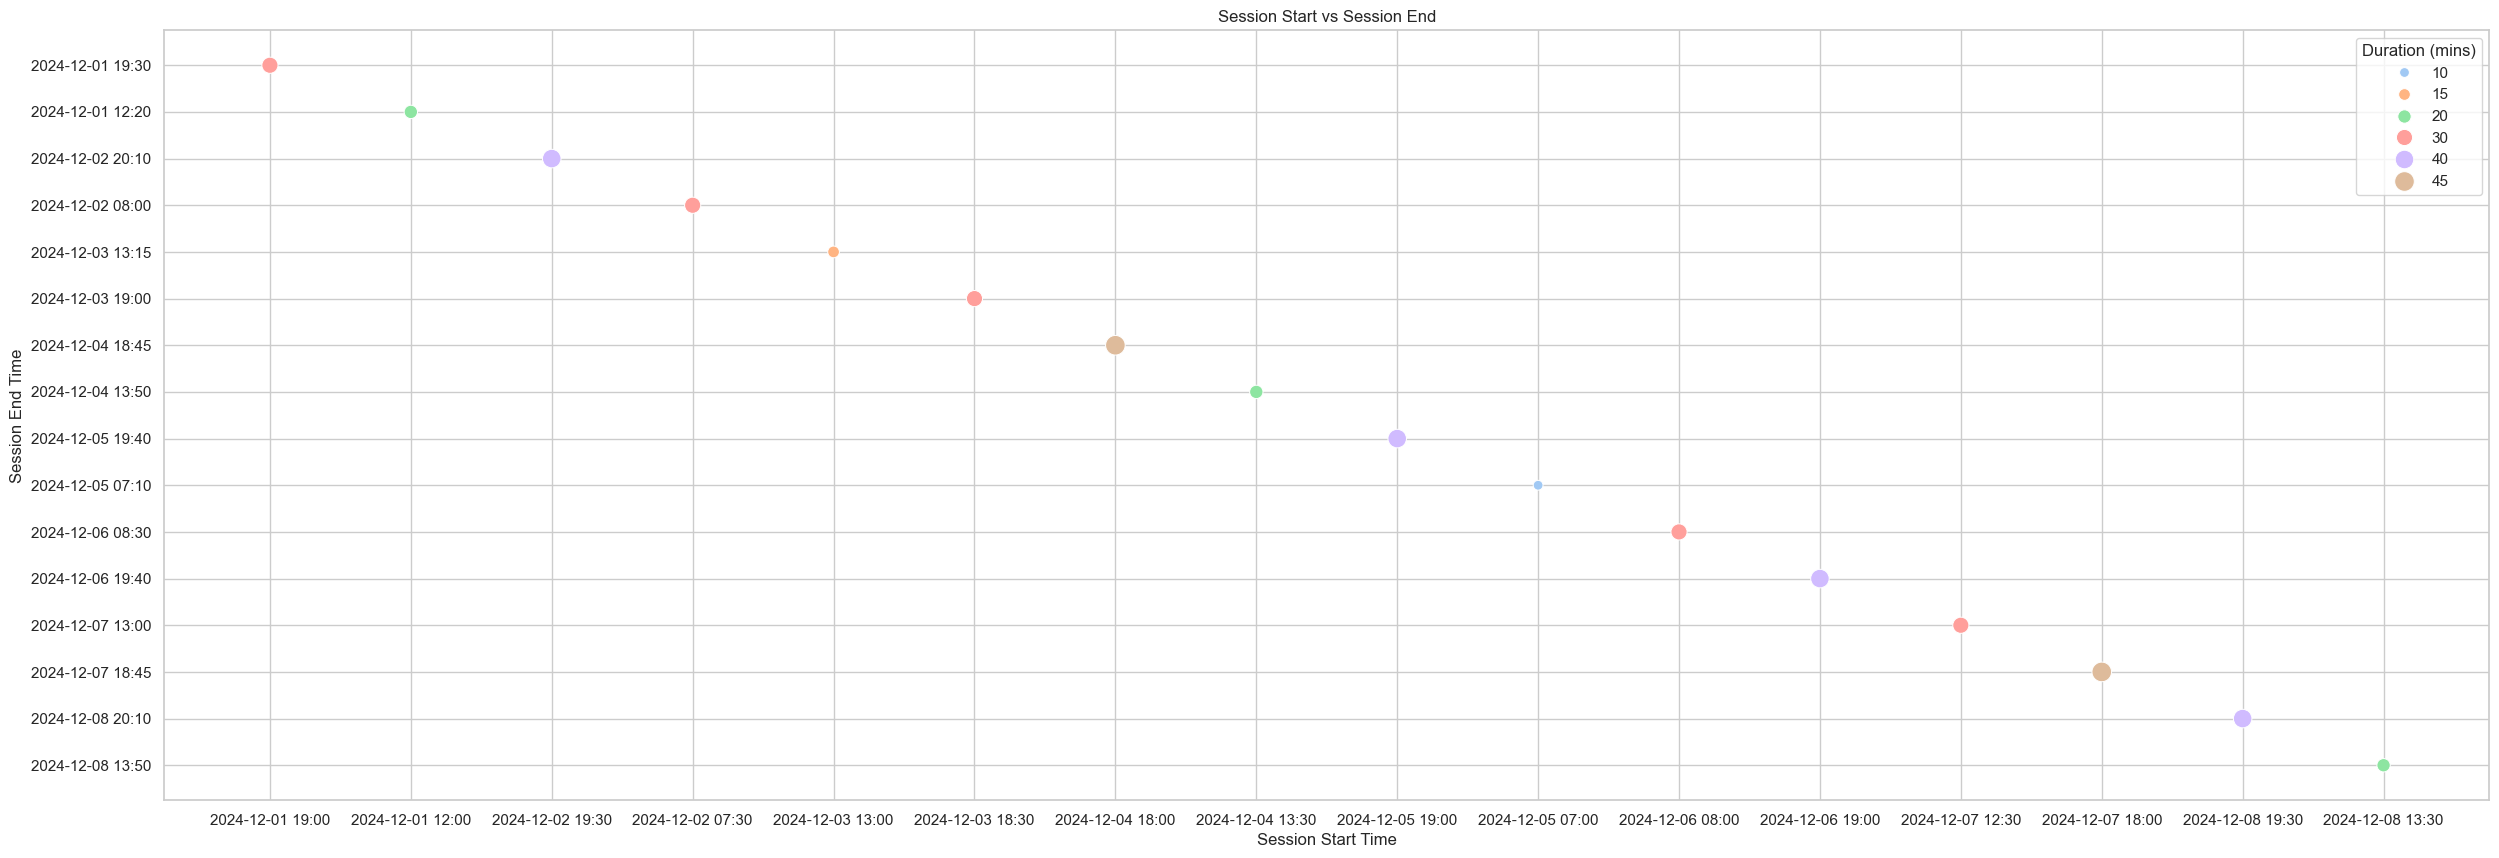

In [78]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data=df, x='Session Start', y='Session End', hue='Duration (mins)', palette='pastel', size='Duration (mins)', sizes=(50, 200))
plt.title('Session Start vs Session End')
plt.xlabel('Session Start Time')
plt.ylabel('Session End Time')
plt.show()

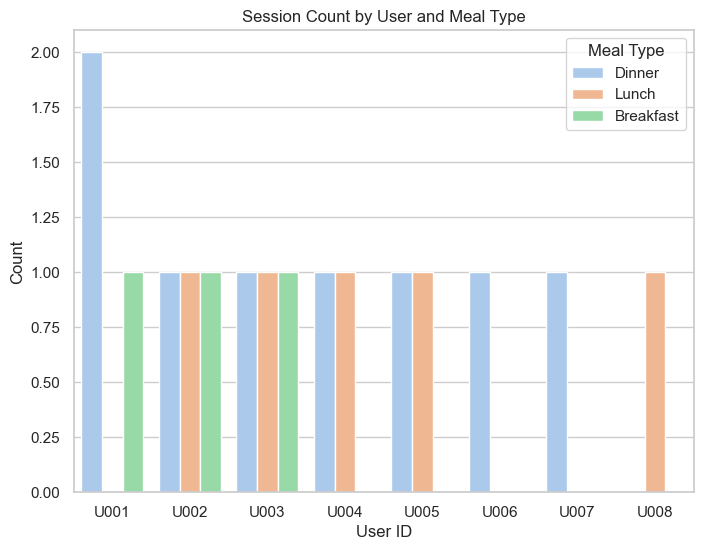

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='User ID', hue='Meal Type', palette='pastel')
plt.title('Session Count by User and Meal Type')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.show()

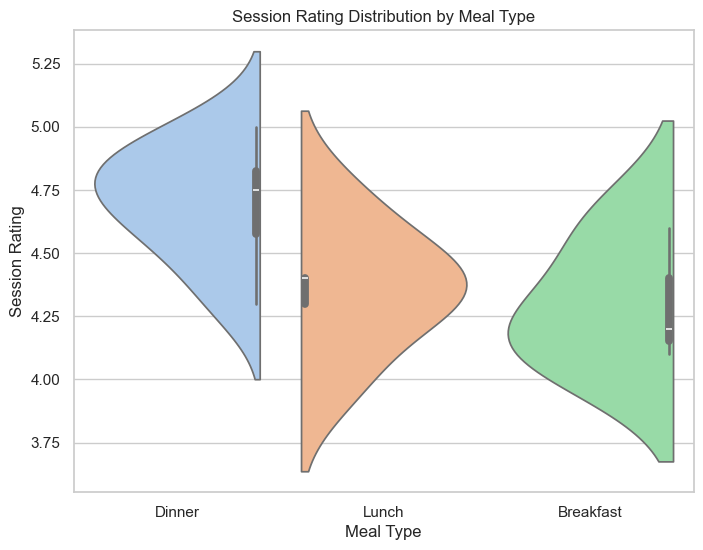

In [82]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Meal Type', y='Session Rating', hue='Meal Type', split=True, palette='pastel')
plt.title('Session Rating Distribution by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Session Rating')
plt.show()

In [85]:
file_path = 'C:/Users/sw/Downloads/UserDetails.csv'
df = pd.read_csv(file_path)

In [86]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            10 non-null     object
 1   User Name          10 non-null     object
 2   Age                10 non-null     int64 
 3   Location           10 non-null     object
 4   Registration Date  10 non-null     object
 5   Phone              10 non-null     object
 6   Email              10 non-null     object
 7   Favorite Meal      10 non-null     object
 8   Total Orders       10 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 848.0+ bytes


(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
 None)

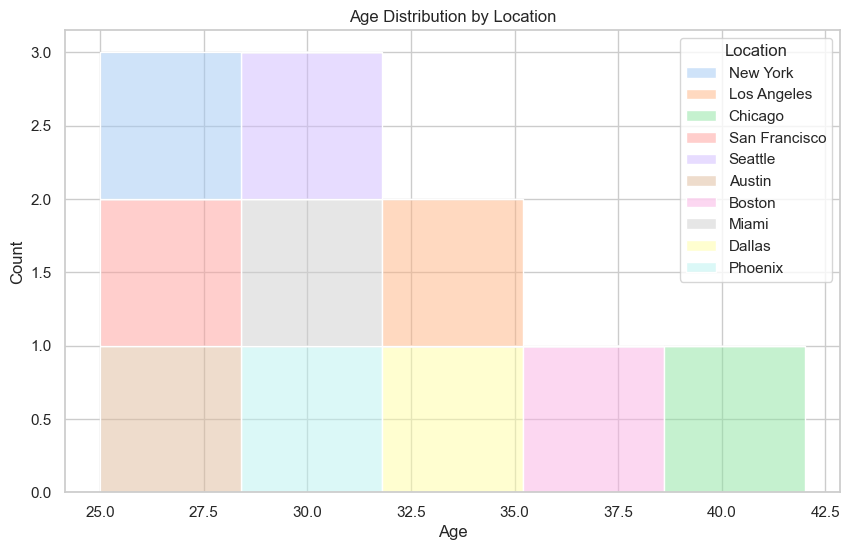

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Location', kde=True, multiple="stack", palette='pastel')
plt.title("Age Distribution by Location")
plt.show()

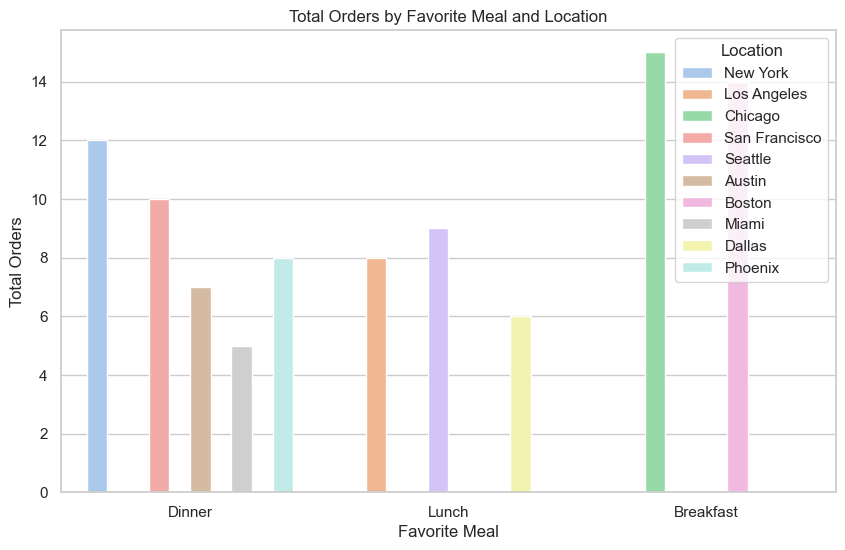

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Favorite Meal', y='Total Orders', hue='Location', data=df, palette='pastel')
plt.title("Total Orders by Favorite Meal and Location")
plt.show()

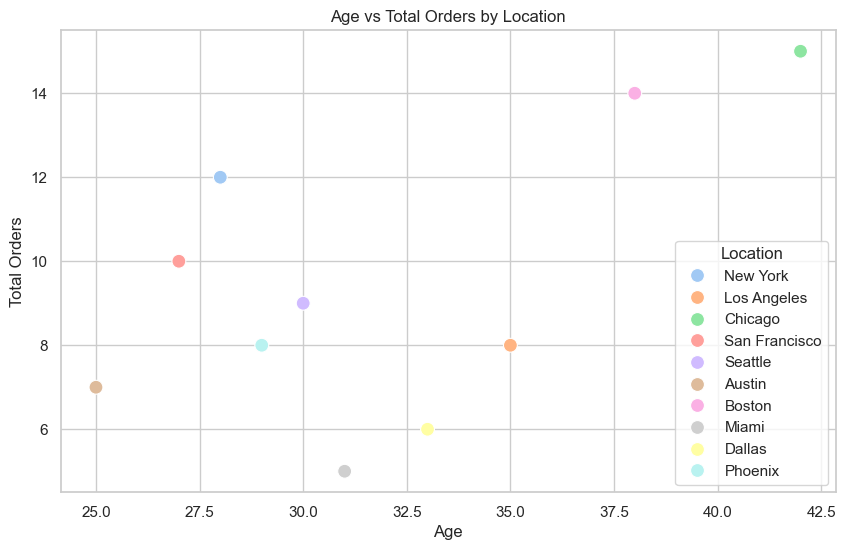

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Orders', hue='Location', data=df, palette='pastel', s=100)
plt.title("Age vs Total Orders by Location")
plt.show()

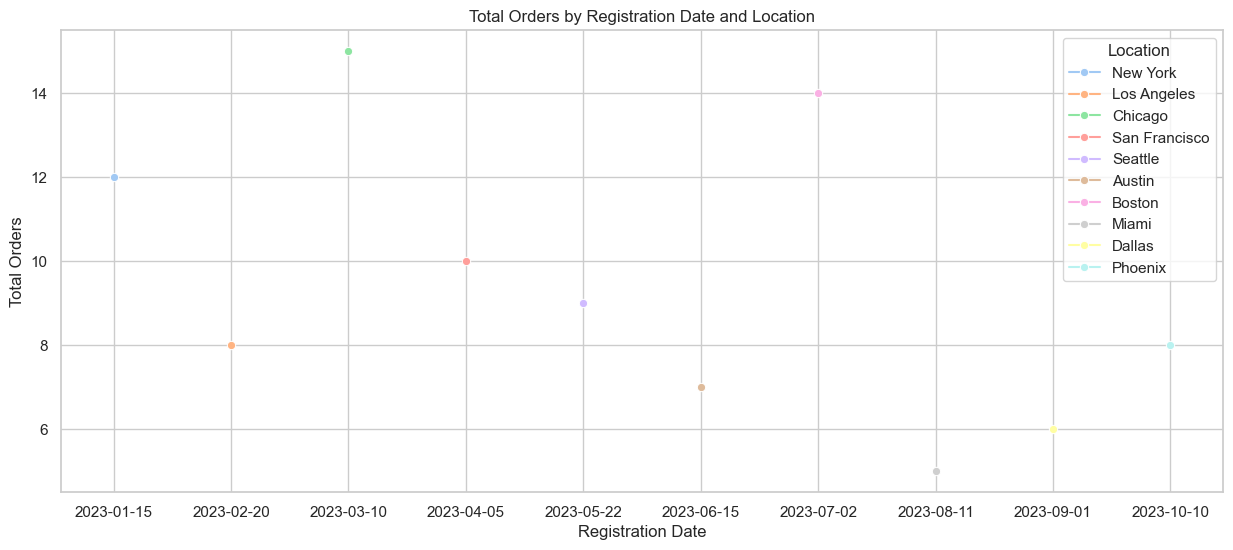

In [91]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Registration Date', y='Total Orders', hue='Location', data=df, marker='o', palette='pastel')
plt.title("Total Orders by Registration Date and Location")
plt.show()

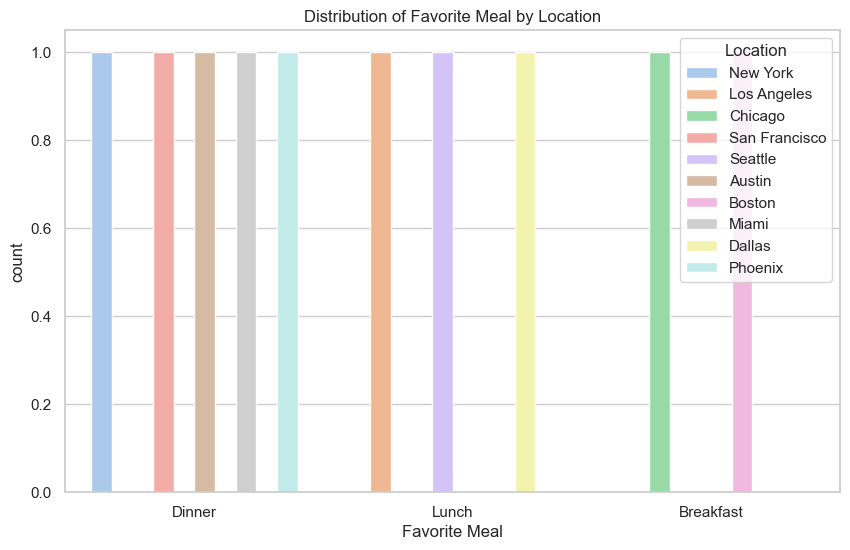

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Favorite Meal', hue='Location', data=df, palette='pastel')
plt.title("Distribution of Favorite Meal by Location")
plt.show()

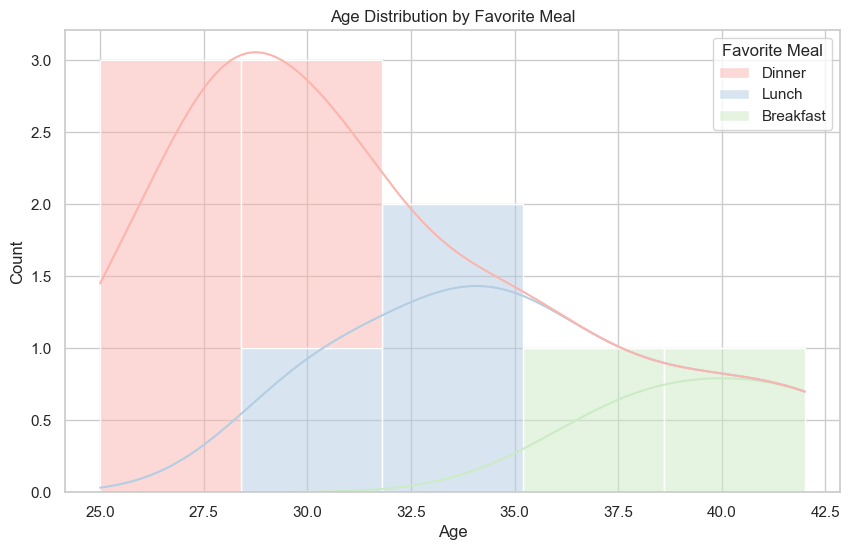

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Favorite Meal', kde=True, multiple="stack", palette='Pastel1')
plt.title("Age Distribution by Favorite Meal")
plt.show()

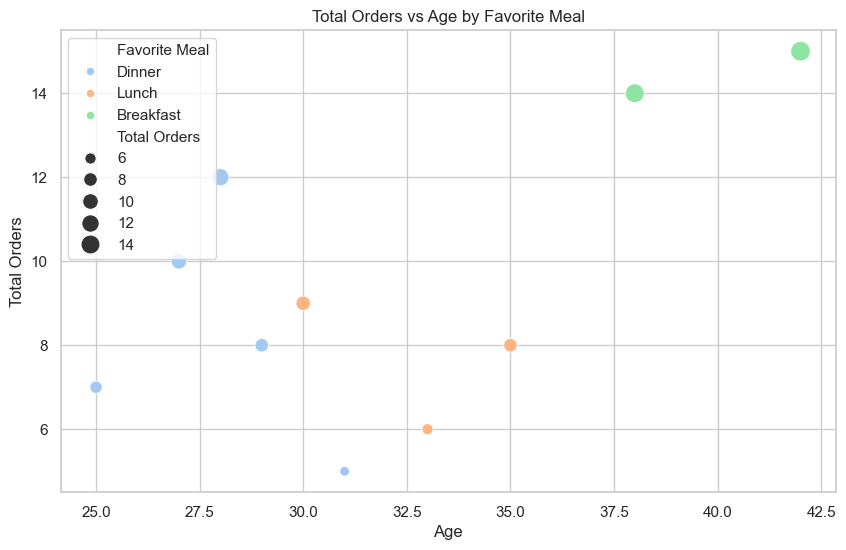

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Orders', hue='Favorite Meal', size='Total Orders', sizes=(50, 200), data=df, palette='pastel')
plt.title("Total Orders vs Age by Favorite Meal")
plt.show()

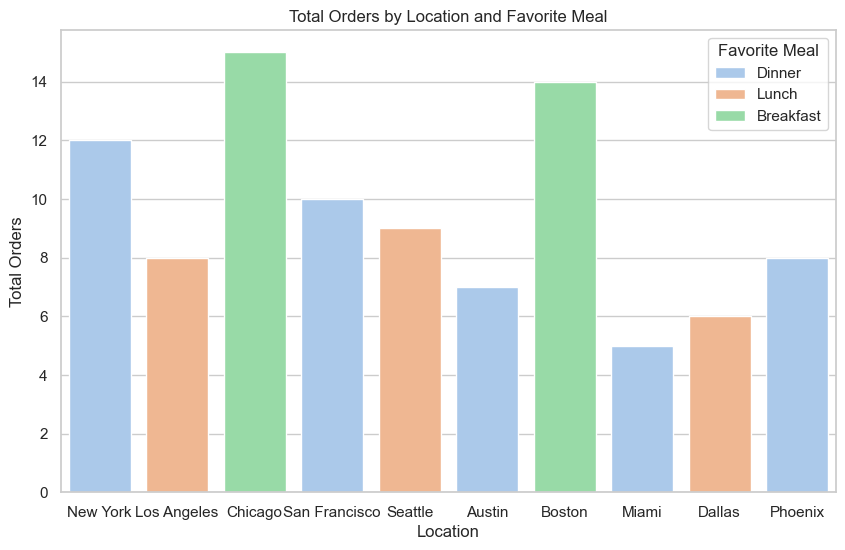

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Total Orders', hue='Favorite Meal', data=df, palette='pastel')
plt.title("Total Orders by Location and Favorite Meal")
plt.show()